In [1]:
import datetime
import numpy as np
from tqdm import tqdm
import papermill as pm
from pathlib import Path
import matplotlib.pyplot as plt

from centrex_TlF_hamiltonian import states, hamiltonian
import centrex_TlF_couplings as couplings

In [2]:
path = Path()

# Parameters

In [3]:
polarizations = "[couplings.polarization_Z, couplings.polarization_X]"

powers = np.arange(0.1, 1.3+0.1, 0.1).tolist()
forward_velocities = np.arange(90, 300+4, 4).tolist()
transverse_velocities = np.arange(-4.5, 4.5+0.2, 0.2).tolist()

ωp = 0.1*hamiltonian.Γ
ωphase = hamiltonian.Γ
β = 3.8
ωl = 2*np.pi*100e3

dx = 2.54e-2 # dx of laser beam
dy = 2*2.54e-2 # dy of laser beam

nprocs = 7

# J=1 Transitions

In [4]:
J_state = states.CoupledBasisState(
    J=1, F1=3/2, F=2, mF=2, I1=1/2, I2=1/2, P=-1, electronic_state = states.ElectronicState.X, Omega=0
)

possible_transitions = couplings.get_possible_optical_transitions(J_state, [couplings.OpticalTransitionType.R])[0]
# first transition doens't cycle to completion, see "R Branch detection initial investigation.ipynb"
possible_transitions = possible_transitions
possible_transitions

[OpticalTransition(R(1) F1'=3/2 F'=1),
 OpticalTransition(R(1) F1'=3/2 F'=2),
 OpticalTransition(R(1) F1'=5/2 F'=2),
 OpticalTransition(R(1) F1'=5/2 F'=3)]

In [5]:
now = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M')

initial_state = f"""states.QuantumSelector(
    J={J_state.J}, F1={J_state.F1}, F={J_state.F}, mF=2, electronic=states.ElectronicState.X
)"""

for transition in possible_transitions:
    transition_name = (
        f"{transition.t.name}{transition.J_ground}_F1_{int(transition.F1*2)}_2_F_{transition.F}"
    )
    transition = f"couplings.OpticalTransition(couplings.{transition.t}, {transition.J_ground}, F1={transition.F1}, F={transition.F})"
    pm.execute_notebook(
        path / 'R_detection_papermill_base.ipynb',
        path / f"{transition_name}_{now}.ipynb",
        dict(
            transition = transition,
            polarizations = polarizations,
            powers = powers,
            forward_velocities = forward_velocities,
            transverse_velocities = transverse_velocities,
            ωp = ωp,
            ωphase = ωphase,
            ωl = ωl,
            β = β,
            dx = dx,
            dy = dy,
            initial_state = initial_state,
            nprocs = nprocs,
            now = now
        )
    )

Executing:   0%|          | 0/58 [00:00<?, ?cell/s]

Executing:   0%|          | 0/58 [00:00<?, ?cell/s]

Executing:   0%|          | 0/58 [00:00<?, ?cell/s]

# J=2 F=2 Transitions

In [6]:
J_state = states.CoupledBasisState(
    J=2, F1=5/2, F=2, mF=0, I1=1/2, I2=1/2, P=+1, electronic_state = states.ElectronicState.X, Omega=0
)

possible_transitions = couplings.get_possible_optical_transitions(J_state, [couplings.OpticalTransitionType.R])[0]
# second transition doens't cycle to completion, see "R Branch detection initial investigation.ipynb"
possible_transitions = list(np.asarray(possible_transitions)[[0,2]])
possible_transitions

[OpticalTransition(R(2) F1'=5/2 F'=2), OpticalTransition(R(2) F1'=7/2 F'=3)]

In [7]:
now = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M')

initial_state = f"""states.QuantumSelector(
    J={J_state.J}, F1={J_state.F1}, F={J_state.F}, mF=2, electronic=states.ElectronicState.X
)"""

for transition in possible_transitions:
    transition_name = (
        f"{transition.t.name}{transition.J_ground}_F1_{int(transition.F1*2)}_2_F_{transition.F}"
    )
    transition = f"couplings.OpticalTransition(couplings.{transition.t}, {transition.J_ground}, F1={transition.F1}, F={transition.F})"
    pm.execute_notebook(
        path / 'R_detection_papermill_base.ipynb',
        path / f"{transition_name}_{now}.ipynb",
        dict(
            transition = transition,
            polarizations = polarizations,
            powers = powers,
            forward_velocities = forward_velocities,
            transverse_velocities = transverse_velocities,
            ωp = ωp,
            ωphase = ωphase,
            ωl = ωl,
            β = β,
            dx = dx,
            dy = dy,
            initial_state = initial_state,
            nprocs = nprocs,
            now = now
        )
    )

Executing:   0%|          | 0/58 [00:00<?, ?cell/s]

Executing:   0%|          | 0/58 [00:00<?, ?cell/s]

# J=2 F=3 Transitions

In [8]:
J_state = states.CoupledBasisState(
    J=2, F1=5/2, F=3, mF=0, I1=1/2, I2=1/2, P=+1, electronic_state = states.ElectronicState.X, Omega=0
)

possible_transitions = couplings.get_possible_optical_transitions(J_state, [couplings.OpticalTransitionType.R])[0]
# second transition doens't cycle to completion, see "R Branch detection initial investigation.ipynb"
possible_transitions = list(np.asarray(possible_transitions)[[-1]])
possible_transitions

[OpticalTransition(R(2) F1'=7/2 F'=4)]

In [9]:
now = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M')

initial_state = f"""states.QuantumSelector(
    J={J_state.J}, F1={J_state.F1}, F={J_state.F}, mF=2, electronic=states.ElectronicState.X
)"""

for transition in possible_transitions:
    transition_name = (
        f"{transition.t.name}{transition.J_ground}_F1_{int(transition.F1*2)}_2_F_{transition.F}"
    )
    transition = f"couplings.OpticalTransition(couplings.{transition.t}, {transition.J_ground}, F1={transition.F1}, F={transition.F})"
    pm.execute_notebook(
        path / 'R_detection_papermill_base.ipynb',
        path / f"{transition_name}_{now}.ipynb",
        dict(
            transition = transition,
            polarizations = polarizations,
            powers = powers,
            forward_velocities = forward_velocities,
            transverse_velocities = transverse_velocities,
            ωp = ωp,
            ωphase = ωphase,
            ωl = ωl,
            β = β,
            dx = dx,
            dy = dy,
            initial_state = initial_state,
            nprocs = nprocs,
            now = now
        )
    )

Executing:   0%|          | 0/58 [00:00<?, ?cell/s]

# Analysis
Compare asymmetry of all J=1 with all J=2 R branch transitions

In [7]:
plt.rcParams.update({'font.size': 14})

In [8]:
def gaussian(x, μ, σ):
    return np.exp(-(x - μ) ** 2 / (2 * σ ** 2))

def generate_convolutions_transverse(data,powers,forward_velocities, transverse_velocities,μvy,σvy):
    transverse_velocities = np.unique(transverse_velocities)
    powers = np.unique(powers)
    forward_velocities = np.unique(forward_velocities)
    Δvy = np.diff(transverse_velocities)[0]
    X,Y = np.meshgrid(powers, forward_velocities)
    conv_transverse = gaussian(
        np.arange(len(transverse_velocities)), 
        (μvy-transverse_velocities.min())/Δvy, 
        σvy/Δvy
    )
    conv_transverse /= conv_transverse.sum()
    
    conv = np.zeros((forward_velocities.size, powers.size))
       
    for idp, power in enumerate(powers):
        conv[:,idp] = data[:,idp,:].T@conv_transverse
    return X,Y,conv

In [9]:
J1_fnames = [
    "R1_F1_3_2_F_2_scan_power_detuning_velocity_with_phase_mod_2022_09_16_12_00.pkl",
    "R1_F1_5_2_F_2_scan_power_detuning_velocity_with_phase_mod_2022_09_16_12_00.pkl",
    "R1_F1_5_2_F_3_scan_power_detuning_velocity_with_phase_mod_2022_09_16_12_00.pkl",    
]
J2_fnames = [
    "R2_F1_5_2_F_2_scan_power_detuning_velocity_with_phase_mod_2022_09_16_13_26.pkl",
    "R2_F1_7_2_F_3_scan_power_detuning_velocity_with_phase_mod_2022_09_16_13_26.pkl",
    "R2_F1_7_2_F_4_scan_power_detuning_velocity_with_phase_mod_2022_09_16_15_49.pkl",
]

In [10]:
from scipy.interpolate import RectBivariateSpline
from itertools import product
import pickle
import pandas as pd
from scipy.stats import binned_statistic

In [11]:
def interpolate_data(X,Y,data):
    x = np.unique(X.flatten())
    y = np.unique(Y.flatten())
    f_conv = RectBivariateSpline(x,y,data.T)
    return f_conv

def format_transition_name(name):
    parts = name[:13].split("_")
    return f"{parts[0][0]}({parts[0][1]}) F1'={parts[2]}/{parts[3]} F'={parts[5]}"

In [12]:
def calculate_asymmetry(signal_J1, signal_J2):
    return (signal_J1 - signal_J2)/(signal_J1 + signal_J2)

def velocity_fluctuations(
    f_J1, f_J2, power = 1, velocity = 184, sigma_velocity = 16, n_samples = 1_000_000, repeats = 10, rng = None
):
    if rng is None:
        rng = np.random.default_rng()
    
    results = []
    for _ in range(repeats):
        velocities = rng.normal(velocity, sigma_velocity, n_samples)


        normalization_constant = f_J1(power, velocity)/f_J2(power, velocity)
        normalization_constant = normalization_constant.flatten()[0]

        velocities.sort()

        signal_J1 = f_J1(power, velocities).flatten()
        signal_J2 = f_J2(power, velocities).flatten() * normalization_constant

        asymmetry = calculate_asymmetry(signal_J1, signal_J2)

        results.append((np.mean(asymmetry), np.std(asymmetry)/np.sqrt(len(asymmetry))))

    df = pd.DataFrame(
        data = {'mean': [r[0] for r in results], 'stdm': [r[1] for r in results]}
    )
    
    return df, asymmetry

def velocity_fluctuations_with_binning(
    f_J1, f_J2, power = 1, velocity = 184, sigma_velocity = 16, 
    velocity_bins =  np.arange(80, 290+5//2, 5), 
    n_samples = 1_000_000, repeats = 10, rng = None
):
    if rng is None:
        rng = np.random.default_rng()
    
    bin_size = np.diff(velocity_bins)[0]
    velocity_bin_centers = velocity_bins[:-1] + bin_size/2
    
    normalization_constants = (
        f_J1(power, velocity_bin_centers) /
        f_J2(power, velocity_bin_centers)
    ).flatten()
    
    results = []
    for _ in range(repeats):
        velocities = rng.normal(velocity, sigma_velocity, n_samples)

        velocities.sort()

        signal_J1 = f_J1(power, velocities).flatten()
        signal_J2 = f_J2(power, velocities).flatten()

        _, _, bin_number = binned_statistic(
            velocities, signal_J2, statistic = 'mean', bins = velocity_bins
        )
        signal_J2 *= normalization_constants[bin_number-1]
        asymmetry = calculate_asymmetry(signal_J1, signal_J2)

        results.append((np.mean(asymmetry), np.std(asymmetry)/np.sqrt(len(asymmetry))))

    df = pd.DataFrame(
        data = {'mean': [r[0] for r in results], 'stdm': [r[1] for r in results]}
    )
    
    return df, asymmetry

def power_fluctuations(
    f_J1, f_J2, power = 1, velocity = 184, sigma_power = 1e-3, n_samples = 1_000_000, repeats = 10, rng = None
):
    if rng is None:
        rng = np.random.default_rng()
    
    results = []
    for _ in range(repeats):
        powers = rng.normal(power, sigma_power, n_samples)


        normalization_constant = f_J1(power, velocity)/f_J2(power, velocity)
        normalization_constant = normalization_constant.flatten()[0]

        powers.sort()

        signal_J1 = f_J1(powers, velocity).flatten()
        signal_J2 = f_J2(powers, velocity).flatten() * normalization_constant

        asymmetry = calculate_asymmetry(signal_J1, signal_J2)

        results.append((np.mean(asymmetry), np.std(asymmetry)/np.sqrt(len(asymmetry))))

    df = pd.DataFrame(
        data = {'mean': [r[0] for r in results], 'stdm': [r[1] for r in results]}
    )
    
    return df, asymmetry

def shot_noise_fluctuations(
    f_J1, f_J2, power = 1, velocity = 184, n_particles = 6.1e8, n_samples = 1_000_000, repeats = 10, rng = None
):
    if rng is None:
        rng = np.random.default_rng()
    
    results = []
    for _ in range(repeats):
        
        μ_J1 = f_J1(power, velocity).flatten()[0] * n_particles/2
        μ_J2 = f_J2(power, velocity).flatten()[0] * n_particles/2

        normalization_constant = μ_J1/μ_J2
        normalization_constant = normalization_constant.flatten()[0]
        
        signal_J1 = rng.normal(μ_J1, np.sqrt(μ_J1), n_samples)
        signal_J2 = rng.normal(μ_J2, np.sqrt(μ_J2), n_samples) * normalization_constant

        asymmetry = calculate_asymmetry(signal_J1, signal_J2)

        results.append((np.mean(asymmetry), np.std(asymmetry)/np.sqrt(len(asymmetry))))

    df = pd.DataFrame(
        data = {'mean': [r[0] for r in results], 'stdm': [r[1] for r in results]}
    )
    
    return df, asymmetry

def error_weighted_mean(y,yerr):
    μwa = np.average(y,weights=1/yerr**2)
    σwa = np.sqrt(1/np.sum(1/yerr**2))
    return μwa, σwa

def plot_asymmetry_repeats(df, title, nσ = 2, ax = None):
    y = df['mean'].values
    yerr = df['stdm'].values

    μwa, σwa = error_weighted_mean(y,yerr)

    if ax is None:
        fig, ax = plt.subplots(figsize=(8,5))

    ax.axhline(μwa, lw = 3, color = 'C0');
    ax.axhspan(μwa - nσ*σwa, μwa + nσ*σwa, color = 'C0', alpha = 0.3)

    ax.errorbar(x=np.arange(len(y))+1, y=y,yerr=yerr, fmt = '.', ms = 15, lw = 3, ecolor = 'C3')

    ax.set_xticks(np.arange(len(y))+1)

    txt = f"asymmetry = {μwa:.1e} +/- {σwa:.1e}"
    ax.text(
        0.95, 0.95, txt, transform=ax.transAxes, ha = 'right', va='top', fontsize = 14,
        bbox=dict(facecolor='white', alpha=1)
    )

    ax.set_xlabel("measurement [#]")
    ax.set_ylabel("asymmetry")
    ax.set_title(
        f"{title}",
        y = 1.05
    )
    ax.grid(True)
    
    if ax is None:
        return fig, ax

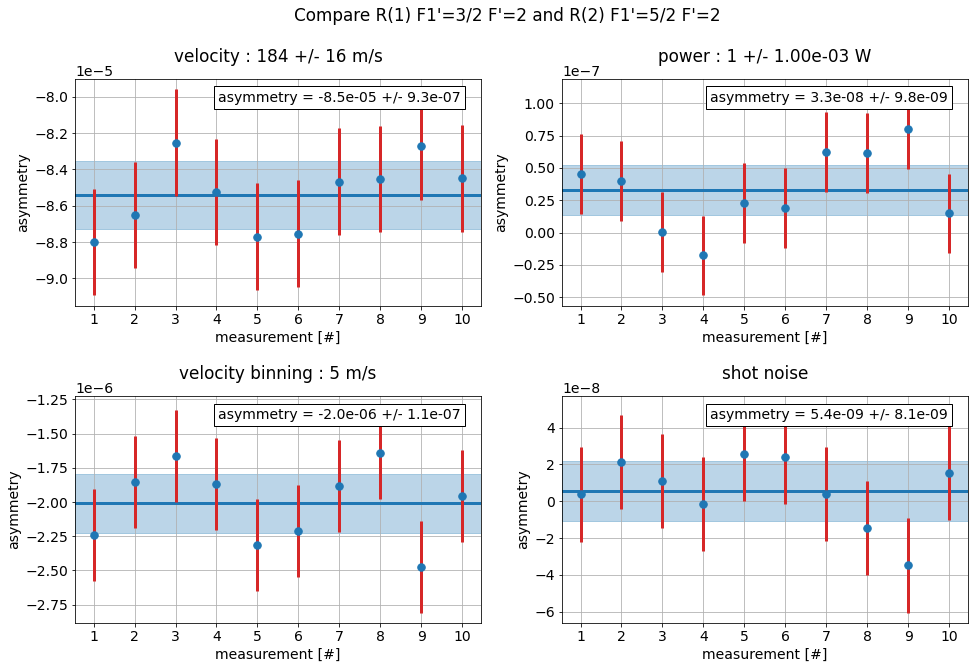

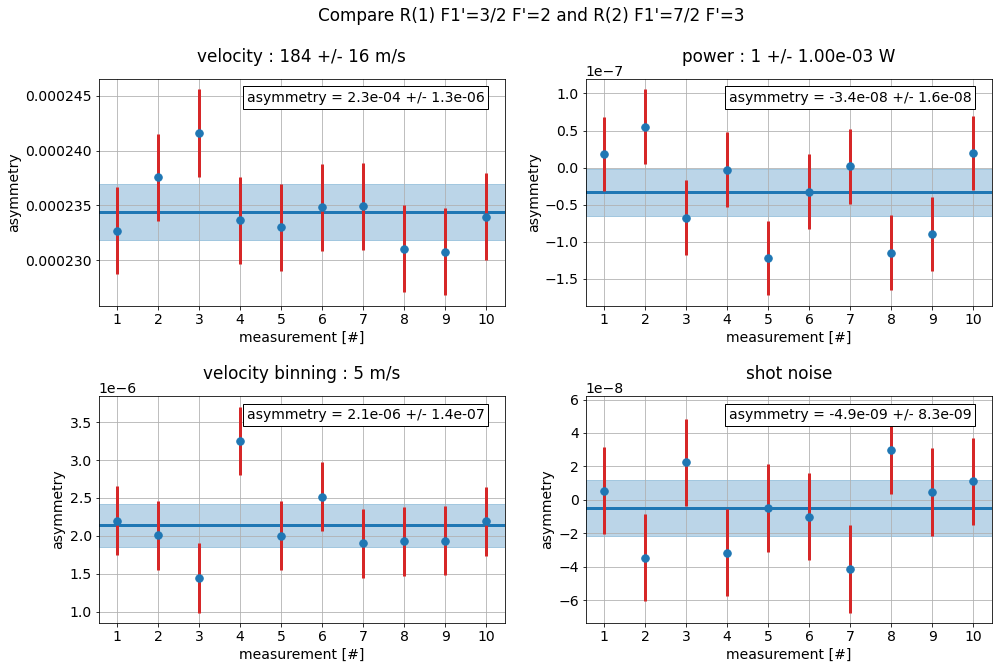

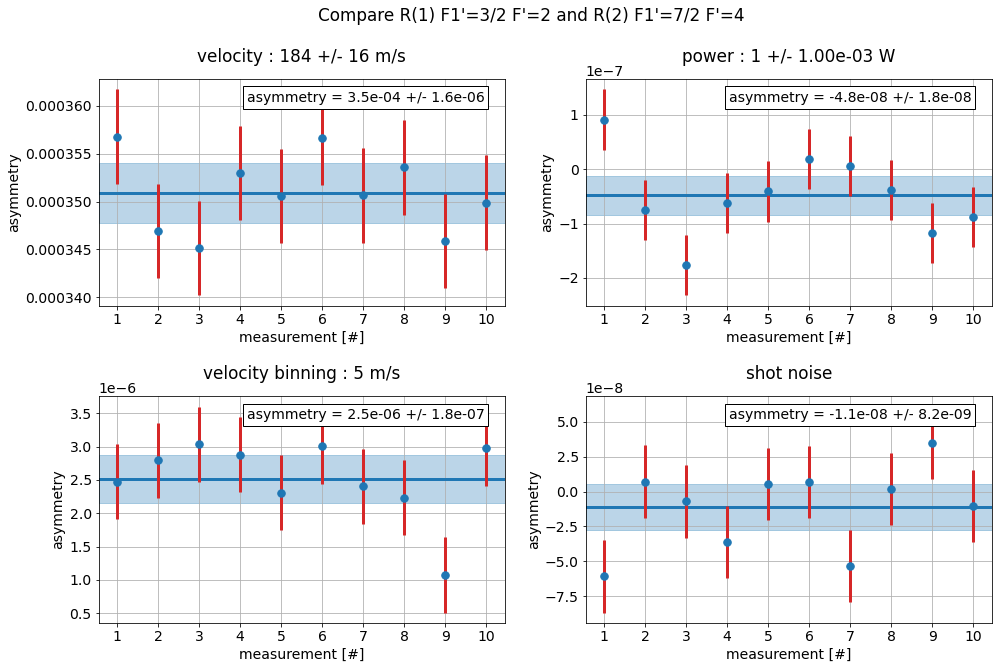

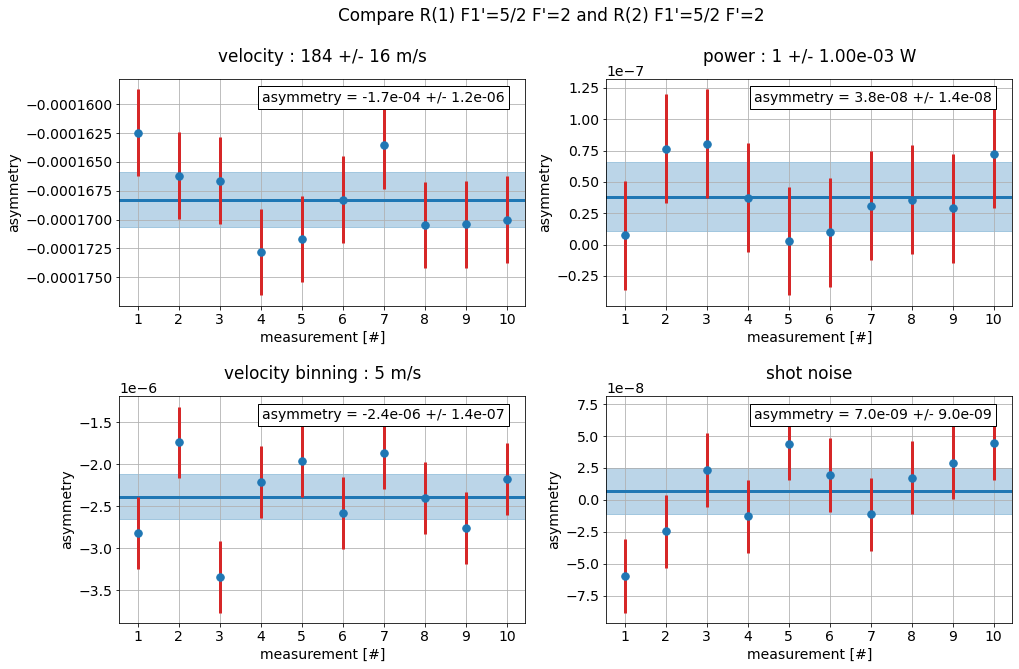

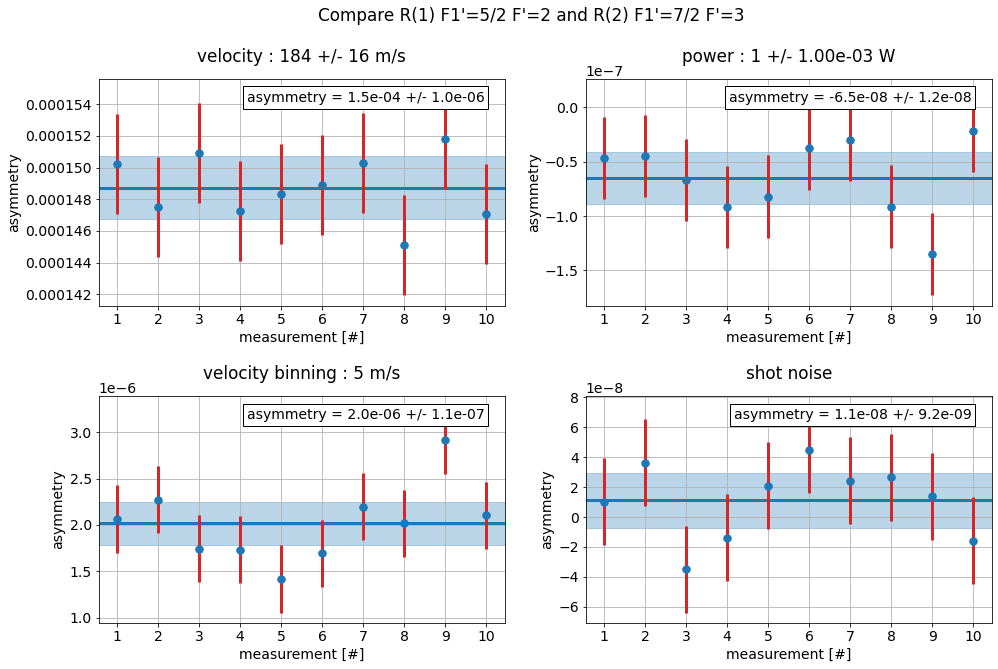

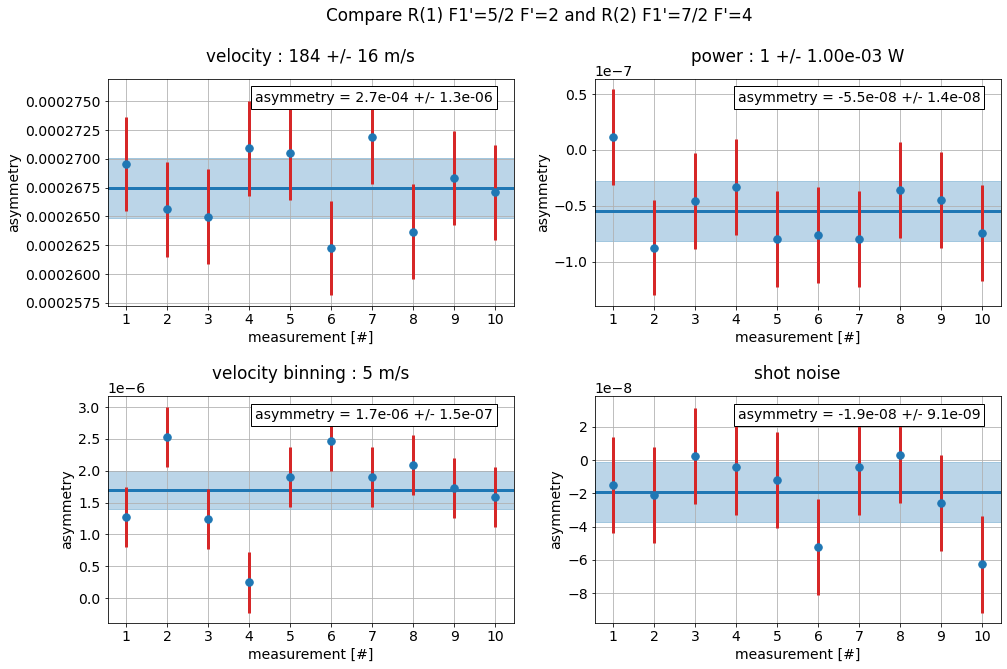

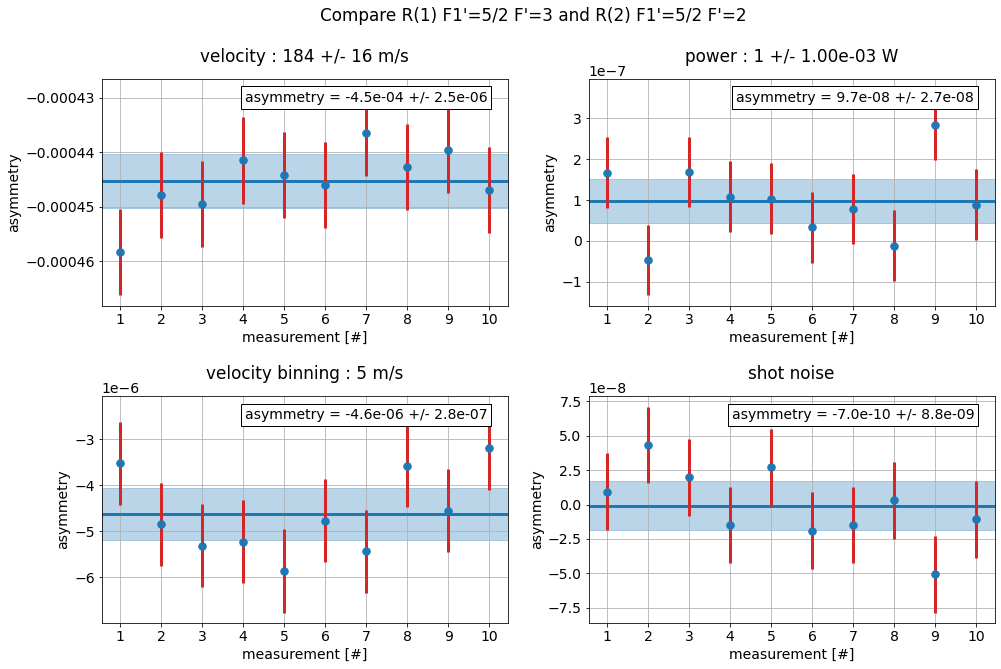

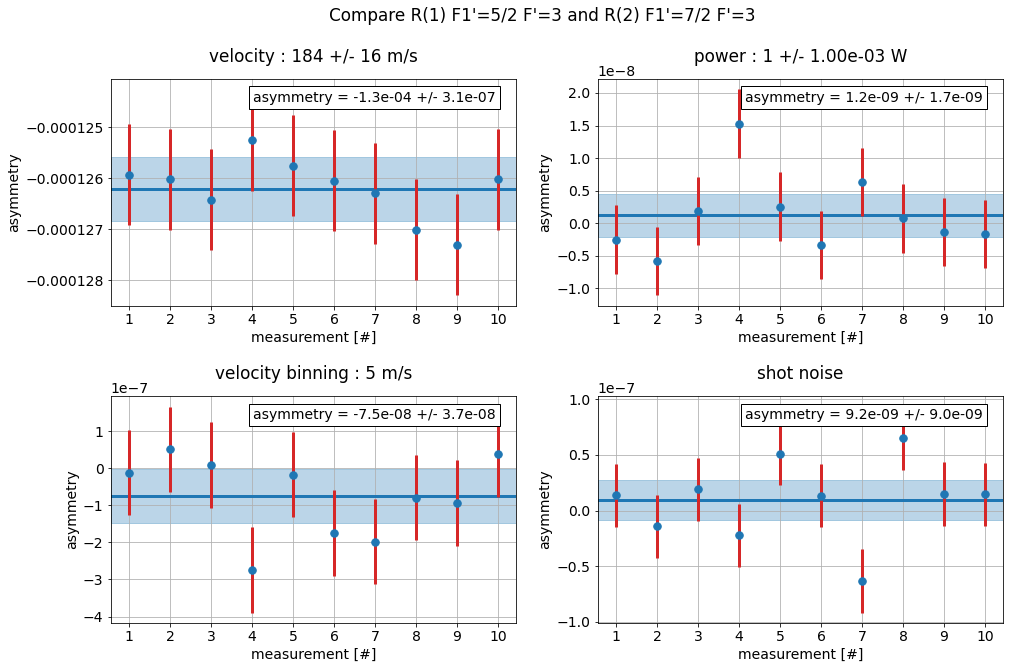

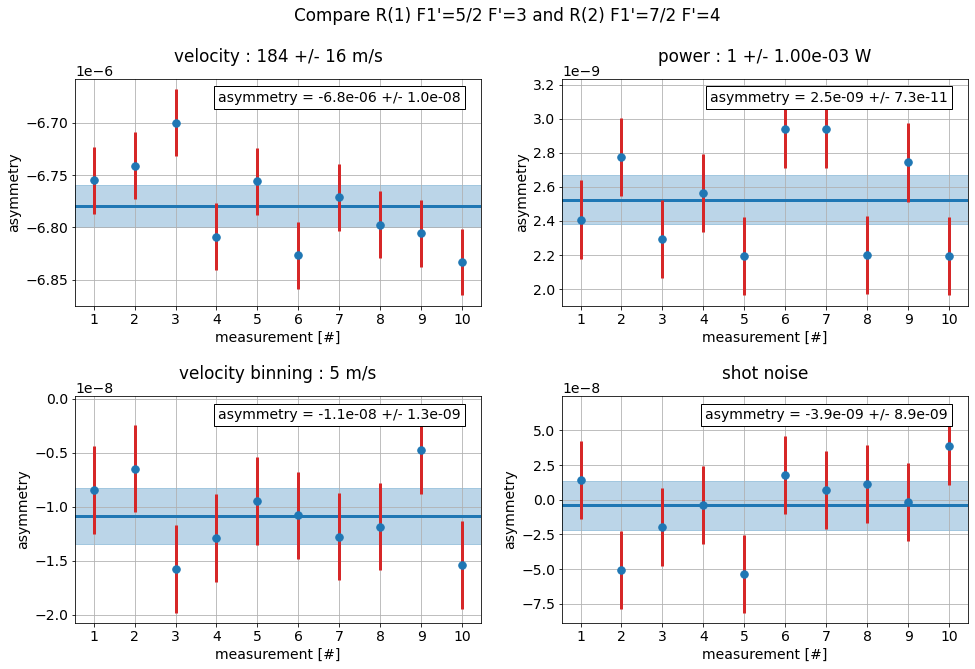

In [16]:
velocity_bin_size = 5
power = 1
sigma_power = 1e-3
velocity = 184
sigma_velocity = 16
sigma_transverse=1.5
n_samples = 1_000_000

results = []


for J1_fname, J2_fname in product(J1_fnames, J2_fnames):
    with open(J1_fname, 'rb') as f:
        J1_data = pickle.load(f)
    with open(J2_fname, 'rb') as f:
        J2_data = pickle.load(f)
        
    res = [format_transition_name(J1_fname), format_transition_name(J2_fname)]
        
    powers_J1 = J1_data['power']
    vz_J1 = J1_data['vz']
    vy_J1 = J1_data['vy']
    photons_J1 = J1_data['photons']

    X_J1, Y_J1, conv_J1 = generate_convolutions_transverse(photons_J1, powers_J1, vz_J1, vy_J1, 0, sigma_transverse)

    f_conv_J1 = interpolate_data(X_J1, Y_J1, conv_J1)

    powers_J2 = J2_data['power']
    vz_J2 = J2_data['vz']
    vy_J2 = J2_data['vy']
    photons_J2 = J2_data['photons']

    X_J2, Y_J2, conv_J2 = generate_convolutions_transverse(photons_J2, powers_J2, vz_J2, vy_J2, 0, sigma_transverse)

    f_conv_J2 = interpolate_data(X_J2, Y_J2, conv_J2)

    rng = np.random.default_rng()


    fig, axs = plt.subplots(2,2,figsize=(16,10))

    # velocity fluctuations
    title = f'velocity : {velocity} +/- {sigma_velocity} m/s'
    df, asymmetry = velocity_fluctuations(
        f_conv_J1, f_conv_J2, rng = rng, velocity=velocity, power=power, sigma_velocity=sigma_velocity,
        n_samples = n_samples
    )
    plot_asymmetry_repeats(df, title, ax = axs[0,0])

    y = df['mean'].values
    yerr = df['stdm'].values
    res.extend(error_weighted_mean(y,yerr))
    
    # velocity fluctuations with binning
    title = f'velocity binning : {velocity_bin_size} m/s'
    bins = np.arange(90, 290+velocity_bin_size//2, velocity_bin_size)
    df, asymmetry = velocity_fluctuations_with_binning(
        f_conv_J1, f_conv_J2, velocity_bins= bins, rng = rng, 
        power=power, velocity=velocity, sigma_velocity=sigma_velocity,
        n_samples = n_samples
    )
    plot_asymmetry_repeats(df, title, ax = axs[1,0])
    
    y = df['mean'].values
    yerr = df['stdm'].values
    res.extend(error_weighted_mean(y,yerr))

    # power fluctuations
    title = f'power : {power} +/- {sigma_power:.2e} W'
    df, asymmetry = power_fluctuations(
        f_conv_J1, f_conv_J2, rng = rng, power=power, velocity=velocity, sigma_power=sigma_power,
        n_samples = n_samples
    )
    plot_asymmetry_repeats(df, title, ax = axs[0,1])
    
    y = df['mean'].values
    yerr = df['stdm'].values
    res.extend(error_weighted_mean(y,yerr))

    # shot noise fluctuations
    title = 'shot noise'
    df, asymmetry = shot_noise_fluctuations(
        f_conv_J1, f_conv_J2, rng = rng, 
        velocity=velocity, power=power,
        n_samples = n_samples
    )
    plot_asymmetry_repeats(df, title, ax = axs[1,1])
    
    y = df['mean'].values
    yerr = df['stdm'].values
    res.extend(error_weighted_mean(y,yerr))

    title = f"Compare {format_transition_name(J1_fname)} and {format_transition_name(J2_fname)}"
    fig.suptitle(title)
    fig.subplots_adjust(hspace = 0.4)

    title = f"compare_{J1_fname[:13]}_and_{J2_fname[:13]}"
    fig.savefig(f"{title}.png", dpi = 300)
    
    results.append(res)

In [88]:
t1, t2, vm, vs, vbm, vbs, pm, ps, sm, ss = zip(*results)

df = pd.DataFrame(data = {
    'transition 1': t1, 'transition 2': t2, 'velocity μ': vm, 'velocity σ':vs, 
    'velocity binned μ': vbm, 'velocity binned σ':vbs, 
    'power μ': pm, 'power σ': ps, 'shot noise μ': sm, 'shot noise σ': ss
})

with pd.option_context('display.float_format', lambda x: '%.1e' % x):
    display(df)

,transition 1,transition 2,velocity μ,velocity σ,velocity binned μ,velocity binned σ,power μ,power σ,shot noise μ,shot noise σ
0,R(1) F1'=3/2 F'=2,R(2) F1'=5/2 F'=2,-8.5e-05,9.3e-07,-2.0e-06,1.1e-07,3.3e-08,9.8e-09,5.4e-09,8.1e-09
1,R(1) F1'=3/2 F'=2,R(2) F1'=7/2 F'=3,2.3e-04,1.3e-06,2.1e-06,1.4e-07,-3.4e-08,1.6e-08,-4.9e-09,8.3e-09
2,R(1) F1'=3/2 F'=2,R(2) F1'=7/2 F'=4,3.5e-04,1.6e-06,2.5e-06,1.8e-07,-4.8e-08,1.8e-08,-1.1e-08,8.2e-09
3,R(1) F1'=5/2 F'=2,R(2) F1'=5/2 F'=2,-1.7e-04,1.2e-06,-2.4e-06,1.4e-07,3.8e-08,1.4e-08,7.0e-09,9.0e-09
4,R(1) F1'=5/2 F'=2,R(2) F1'=7/2 F'=3,1.5e-04,1.0e-06,2.0e-06,1.1e-07,-6.5e-08,1.2e-08,1.1e-08,9.2e-09
5,R(1) F1'=5/2 F'=2,R(2) F1'=7/2 F'=4,2.7e-04,1.3e-06,1.7e-06,1.5e-07,-5.5e-08,1.4e-08,-1.9e-08,9.1e-09
6,R(1) F1'=5/2 F'=3,R(2) F1'=5/2 F'=2,-4.5e-04,2.5e-06,-4.6e-06,2.8e-07,9.7e-08,2.7e-08,-7.0e-10,8.8e-09
7,R(1) F1'=5/2 F'=3,R(2) F1'=7/2 F'=3,-1.3e-04,3.1e-07,-7.5e-08,3.7e-08,1.2e-09,1.7e-09,9.2e-09,9.0e-09
8,R(1) F1'=5/2 F'=3,R(2) F1'=7/2 F'=4,-6.8e-06,1.0e-08,-1.1e-08,1.3e-09,2.5e-09,7.3e-11,-3.9e-09,8.9e-09


In [104]:
def generate_dataframe_from_data(df, stat):
    x = np.unique(df['transition 1'])
    y = np.unique(df['transition 2'])
    
    df_n = pd.DataFrame()
    
    data = np.zeros([y.size, x.size])
    for idx,xi in enumerate(x):
        col = []
        for idy,yi in enumerate(y):
            idt = (df['transition 1'] == xi).values
            idt &= (df['transition 2'] == yi).values
            idt = np.where(idt)[0]
            col.append(df[stat][idt].values[0])
        
        df_n[xi] = col
    df_n.set_index(y, inplace=True)
    return df_n

In [105]:
def generate_matrix_from_data(df, stat):
    x = np.unique(df['transition 1'])
    y = np.unique(df['transition 2'])
    
    data = np.zeros([y.size, x.size])
    for idx,xi in enumerate(x):
        for idy,yi in enumerate(y):
            idt = (df['transition 1'] == xi).values
            idt &= (df['transition 2'] == yi).values
            idt = np.where(idt)[0]
            data[idy,idx] = df[stat][idt]
    return x,y,data

In [192]:
heading_properties = [('font-size', '18px')]

cell_properties = [('font-size', '16px'),('font-weight', 'bold')]

caption_properties = [('font-size', '24px'),('font-weight', 'bold')]

dfstyle = [
    dict(selector="th", props=heading_properties),
    dict(selector="td", props=cell_properties),
    dict(selector="caption", props=caption_properties)
]

def color_cells(row):
    arr = []
    for cell in row:
        if np.abs(cell) > 1.5:
            arr.append('background-color: #de796e; color: white')
        elif (np.abs(cell) > 1) & (np.abs(cell) < 1.5):
            arr.append('background-color: #00527b	; color: white')
        elif np.abs(cell) <= 1:
            arr.append('background-color: #5eae76	; color: white')
    return arr

def format_numbers(val):
    if np.abs(val) < .1:
        return f"{val:.1e}"
    elif np.abs(val) > 1000:
        return f"{val:.1e}"
    elif np.abs(val) >= 10:
        return f"{val:.0f}"
    else:
        return f"{val:.1f}"
    
def display_dataframe_from_data(df, stat, stat_normalize = 'shot noise σ'):
    _ = generate_dataframe_from_data(df, stat) / generate_dataframe_from_data(df, stat_normalize)
    display(_.style.set_caption(f"asymmetry: {stat} / {stat_normalize}").format(format_numbers).set_table_styles(dfstyle).apply(color_cells))

display_dataframe_from_data(df, 'power σ')
display_dataframe_from_data(df, 'velocity σ')
display_dataframe_from_data(df, 'velocity binned σ')

display_dataframe_from_data(df, 'power μ')
display_dataframe_from_data(df, 'velocity μ')
display_dataframe_from_data(df, 'velocity binned μ')

,R(1) F1'=3/2 F'=2,R(1) F1'=5/2 F'=2,R(1) F1'=5/2 F'=3
R(2) F1'=5/2 F'=2,1.2,1.5,3.1
R(2) F1'=7/2 F'=3,1.9,1.3,0.2
R(2) F1'=7/2 F'=4,2.1,1.5,8.2e-03


,R(1) F1'=3/2 F'=2,R(1) F1'=5/2 F'=2,R(1) F1'=5/2 F'=3
R(2) F1'=5/2 F'=2,115,131,283
R(2) F1'=7/2 F'=3,152,109,35
R(2) F1'=7/2 F'=4,191,142,1.1


,R(1) F1'=3/2 F'=2,R(1) F1'=5/2 F'=2,R(1) F1'=5/2 F'=3
R(2) F1'=5/2 F'=2,13,15,32
R(2) F1'=7/2 F'=3,17,12,4.1
R(2) F1'=7/2 F'=4,22,16,0.1


,R(1) F1'=3/2 F'=2,R(1) F1'=5/2 F'=2,R(1) F1'=5/2 F'=3
R(2) F1'=5/2 F'=2,4.0,4.2,11
R(2) F1'=7/2 F'=3,-4.1,-7.0,0.1
R(2) F1'=7/2 F'=4,-5.9,-6.0,0.3


,R(1) F1'=3/2 F'=2,R(1) F1'=5/2 F'=2,R(1) F1'=5/2 F'=3
R(2) F1'=5/2 F'=2,-1.1e+04,-1.9e+04,-5.1e+04
R(2) F1'=7/2 F'=3,2.8e+04,1.6e+04,-1.4e+04
R(2) F1'=7/2 F'=4,4.3e+04,2.9e+04,-762


,R(1) F1'=3/2 F'=2,R(1) F1'=5/2 F'=2,R(1) F1'=5/2 F'=3
R(2) F1'=5/2 F'=2,-249,-264,-525
R(2) F1'=7/2 F'=3,259,219,-8.4
R(2) F1'=7/2 F'=4,308,186,-1.2
